In [2]:
from sklearn.cluster import KMeans
random_state = 2
kmeans = KMeans(n_clusters=2, random_state=random_state)

In [4]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('./data/EastWestAirlines.csv')
scaler = MinMaxScaler(feature_range=(0, 1))
data_norm = scaler.fit_transform(data)
kmeans.fit_transform(data_norm)


/Users/alejandro/Programming/Courses/EEC189G-Spring23/HW3/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.69360469, 1.22052825],
       [0.68994071, 1.21812635],
       [0.69077858, 1.21541797],
       ...,
       [1.18512635, 0.70018367],
       [0.58123262, 1.29889882],
       [0.5847537 , 1.30261719]])

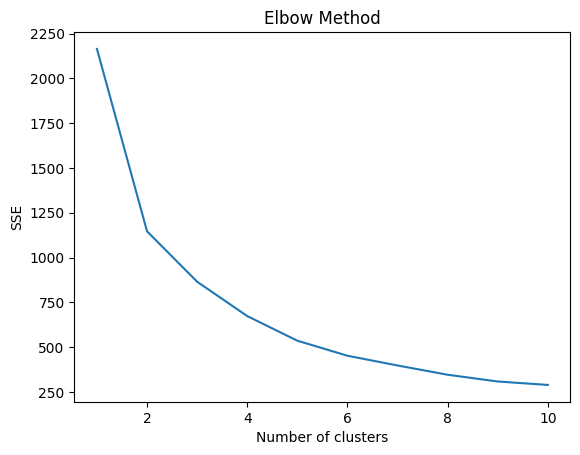

In [8]:
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=random_state)
    kmeans.fit(data_norm)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


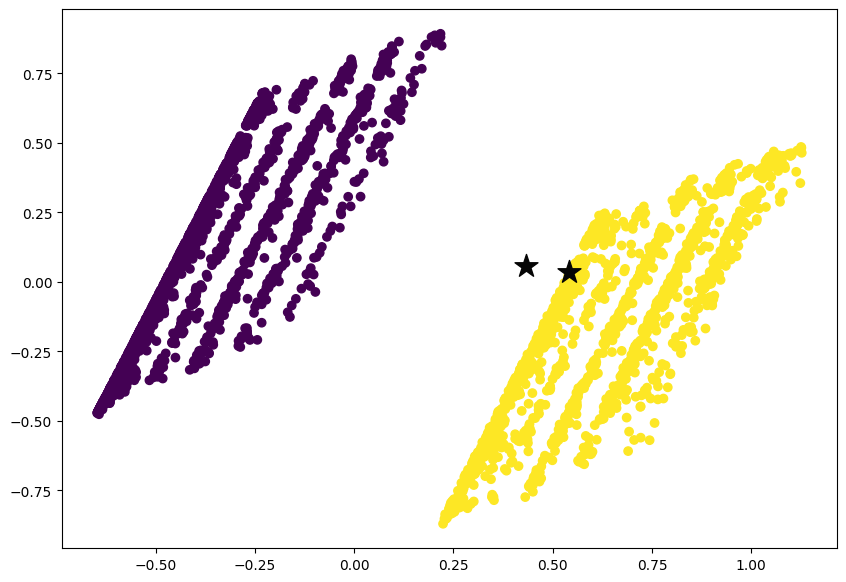

In [6]:
from sklearn.decomposition import PCA

centroids = kmeans.cluster_centers_

labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_norm)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='#050505')

plt.show()